# Проверка гипотиз для увеличения прибыли 

**Описание проекта**

Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты

**Цель проекта**

Проверить гипотизы и выяснить как увеличить прибыль компании

**План исследования**

- Обзор и предобработка данных;
- Приоритизация гипотез;
- Анализ A/B-теста;
- Выводы по всей работе.

## Обзор и предобработка данных

In [1]:
# импорт библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt
import scipy.stats as stats
import warnings

from scipy import stats as st

pd.set_option('display.max_colwidth', 200)

In [2]:
# выгрузим файлы 

hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

# посмотрим типы данных всех файлов

hypothesis.info()
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [5]:
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [6]:
# Переименуем столбцы

hypothesis.columns = hypothesis.columns.str.lower()
orders = orders.rename(columns = {'transactionId':'transaction_id', 'visitorId':'visitor_id'})
print(hypothesis.columns)
print(orders.columns)

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')
Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')


In [7]:
# Проверим количество пропусков и явных дубликатов

print('Посетители:\n',visitors.isna().sum())
print('Дубликаты посетителей:', visitors.duplicated().sum())

print('Заказы:\n',orders.isna().sum())
print('Дубликаты заказов:', orders.duplicated().sum())

print('Гипотезы:\n',hypothesis.isna().sum())
print('Дубликаты гипотез:', hypothesis.duplicated().sum())

Посетители:
 date        0
group       0
visitors    0
dtype: int64
Дубликаты посетителей: 0
Заказы:
 transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64
Дубликаты заказов: 0
Гипотезы:
 hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64
Дубликаты гипотез: 0


In [8]:
# Переведем даты к нужному типу 

visitors['date'] = pd.to_datetime(visitors['date'])
orders['date'] = pd.to_datetime(orders['date'])

visitors.info()
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


**Вывод:** данные подготовила к анализу, заменила тип данных в стобдцах с датой. Так же заменила нозвания столбцов и привела их к нижниму регистру в соответствии с этикетом. Явных дубликатов и пропусков не обнаружила.

## Приоритизация гипотез

In [9]:
# Метод ICE 

hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


In [10]:
# Метод RICE

hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [11]:
# Соединим полученные таблицы 

hypothesis[['hypothesis','ice', 'rice']].sort_values(by='rice', ascending=False).head(5)

,hypothesis,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.2


**Вывод:** приотезация гипотиз изменилась тк в методе RICE учитывается охват пользователй а в ICE - нет. Тау же вывела топ 5 самых приоритетных гипотез. На мой взгляд, одна из самых выиграшных гипотез: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", у нее высокие показатели и по RICE и по ICE.

## Анализ A/B-теста

### Кумулятивные метрики

In [12]:
# Создадим датафрейм с уникальными значениями 'data' и 'group' таблицы orders и избавимся от дубликатов

datesGroups = orders[['date', 'group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

ordersAggregated.head(5)

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [13]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])
visitorsAggregated.head(5)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [14]:
# объединяем кумулятивные данные в одной таблице и добавляем конверсию

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)

cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeData['conversion'] = (
    cumulativeData['orders'] / cumulativeData['visitors']
)

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,62,354874,1845,0.036856


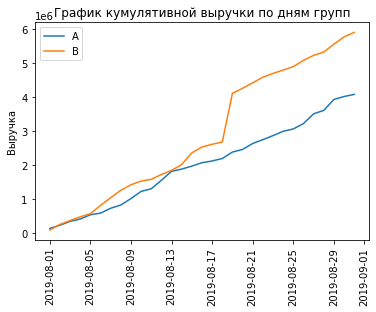

In [15]:
# Строим график кумулятивной выручки по дням группы

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по дням групп')
plt.ylabel("Выручка")
plt.xticks(rotation=90)
plt.legend()
plt.show()

**Вывод:** кумулятивная выручка у группы А меньше чем у группы В. В группе В есть довольно резкое изменение в период с 17 августа до 21 августа 2019 года, возможно было резкое увеличение заказов или дорогая покупка.

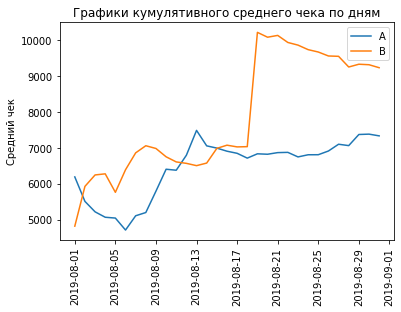

In [16]:
#Строим графики кумулятивного среднего чека по дням

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Графики кумулятивного среднего чека по дням')
plt.ylabel("Средний чек")
plt.xticks(rotation=90)
plt.legend()
plt.show()

**Вывод:** кумулятивный средний чек у группы В выше. У группы В был резкий скачек  в тот же период, скорее всего была дорогая покупака.Сначала не долгое время лидировала группа А, почти на следуйщий день первенство перехватила группа В и почти все время лидиковала  (только 13-08-2019 группе А удалось увеличить средний чек). Обе группых стабилизировались к концу графика.

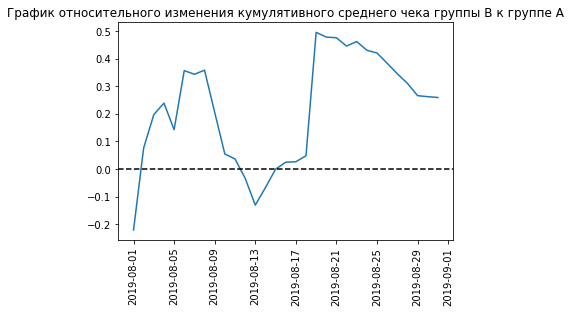

In [17]:
#Строим график относительно различия кумулятивного среднего чека группы B к группе A. 

mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation=90)
plt.show()

**Вывод:** график резко меняется в некоторых местах, что говорит нам  крупных покупках.

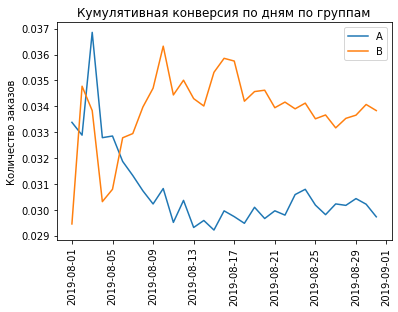

In [18]:
# Построим графики кумулятивной конверсии по дням по группам.

cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Кумулятивная конверсия по дням по группам')
plt.ylabel('Количество заказов')
plt.xticks(rotation=90)
plt.show()

**Вывод:** количество заказов выше у группы В. В начале графика обе группы сделали резкий скачек, дальше их количество заказов выровнилось, первенство всзяла группа В.

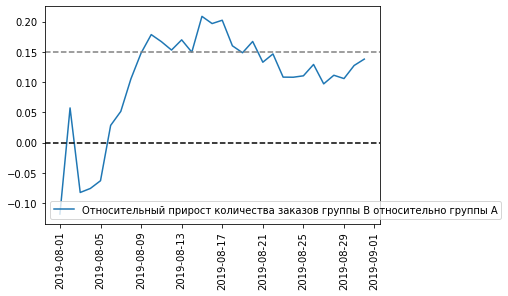

In [19]:
# Построим график относительного различия кумулятивной конверсии группы B к группе A.

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост количества заказов группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.xticks(rotation=90)
plt.show()

**Вывод:** количество заказов группы В выше чем у группы А, количество заказов сначала растет, потом падает, затем снова растет. График зафиксировался примерно около 0,14.

### Анализ выбросов и всплесков: крайние значения данных

      visitor_id  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


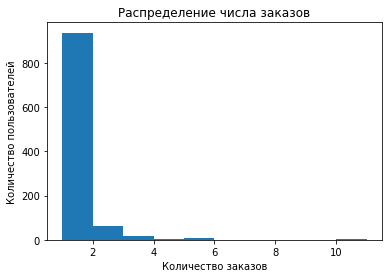

In [20]:
# Построим гистограмму распределения числа заказов

ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['visitor_id', 'orders']
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

plt.hist(ordersByUsers['orders']) 
plt.title('Распределение числа заказов')
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей')
plt.show()

**Вывод:** большинство пользователей сделали 1 заказ, но есть два пользователя которые сделали по 11 заказов.

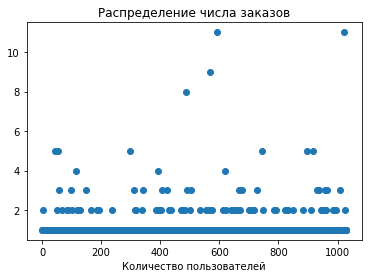

In [21]:
# Построим диаграмму распределения числа заказов

x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Распределение числа заказов')
plt.xlabel('Количество пользователей')
plt.show()

**Вывод:** есть пользователи которые сделали по 2-3 заказа, что бы проверить являются ли они аномальными, посчитаем выборочные перцентили.

In [22]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

**Вывод:** не больше 5% пользователей сделали 2 и больше заказа. Верхнюю границу возьмем 4 заказа на одного пользователя.

      transaction_id  visitor_id       date  revenue group
425        590470918  1920142716 2019-08-19  1294500     B
1196      3936777065  2108080724 2019-08-15   202740     B
858        192721366  1316129916 2019-08-27    93940     A
1136       666610489  1307669133 2019-08-13    92550     A
744       3668308183   888512513 2019-08-27    86620     B
682       1216533772  4266935830 2019-08-29    78990     B
662       1811671147  4266935830 2019-08-29    78990     A
743       3603576309  4133034833 2019-08-09    67990     A
1103      1348774318  1164614297 2019-08-12    66350     A
1099       316924019   148427295 2019-08-12    65710     A


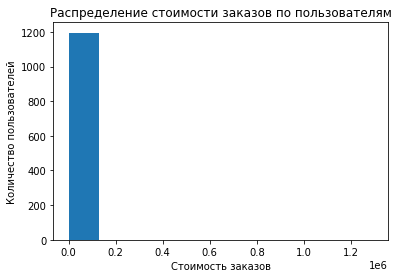

In [23]:
# Построим гистограмму распределения выручек с заказов по пользователям

print(orders.sort_values(by='revenue', ascending=False).head(10))

plt.hist(orders['revenue']) 
plt.title('Распределение стоимости заказов по пользователям')
plt.xlabel('Стоимость заказов')
plt.ylabel('Количество пользователей')
plt.show()

**Вывод:** самые дорогие заказы стоили:202740 и 1294500, его сделали пользователи из группы В, их стоит убрать в диаграмме, чтобы более детально расмотреть других пользователей.

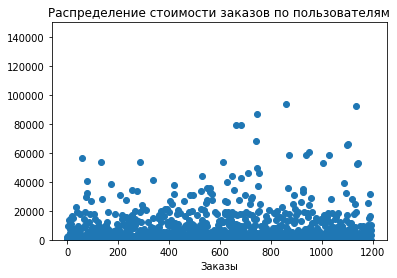

In [24]:
# Построим диаграмму распределения выручек с заказов по пользователям

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.ylim(0, 150000)
plt.scatter(x_values, orders['revenue']) 
plt.title('Распределение стоимости заказов по пользователям')
plt.xlabel('Заказы')
plt.show()

**Вывод:** большая часть заказов до 20000. Посчитаем 95 и 99 прецентили.

In [25]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

**Вывод:** граница аномалий 58233.

### Анализ статистической значимости

#### "Серые" данные

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.

Сформулируем гипотезы. Нулевая: в "серых" данных различий в среднем количестве заказов между группами нет. Альтернативная: в "серых" данных различия в среднем между группами есть.

Подготовим данны к проверке гипотез критерием Манна-Уитни.Уровень статистической значимости установим 0.05.

In [26]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

In [27]:
# Объявим переменные sampleA и sampleB

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders'] 

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 


In [33]:
# Выведите относительное различие в среднем между группами и p-value для сравнения среднего между группами

print('p-value:',"{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('относительное различие в среднем между группами:',
    "{0:.3f}".format(
        (data['ordersPerDateB'].sum() / data['visitorsPerDateB'].sum())
        / (data['ordersPerDateA'].sum() / data['visitorsPerDateA'].sum())
        - 1
    )
)

p-value: 0.01679
относительное различие в среднем между группами: 0.138


**Вывод:** по серым данным группы различаются. Группа В относительно больше группы А на 13,8%. Тк p-value - 0.01679, что меньше 0.05, принимаем альтернативную гипотезу различия в среднем между группами есть.

**Сформулируем гипотезы для проверки среднего чека**.
- **Нулевая: в "серых" данных различий в среднем чеке между группами нет.**
- **Альтернативная: в "серых" различия в среднем чеке между группами есть.**

In [29]:
# Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

print('p-value:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('статистическая значимость различий в среднем чеке:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value: 0.729
статистическая значимость различий в среднем чеке: 0.259


**Вывод:** тк p-value - 0.729, значит различий в среднем количестве заказов между группами нет. Средний чек у группы В на 25,9% больше чем у группы А

#### «Очищенные» данные.

В пункте 3.2 мы выявили аномалии: число заказов - больше 4, и заказ дороже 58233.

In [30]:
# Вясним количество аномальных пользователей 

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 58233]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
abnormalUsers.shape[0]

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitor_id, dtype: int64


15

**Вывод:** всего аномальных пользователей 15.

**Сформулируем гипотезы для очищенных данных:**
- **Нулевая: в "отфильтрованных" данных различий в среднем количестве заказов между группами нет.**
- **Альтернативная: в "отфильтрованных" данных различия в среднем между группами есть.**

**Сформулируем гипотезы для проверки среднего чека**.
- **Нулевая: в "отфильтрованных" данных различий в среднем чеке между группами нет.**
- **Альтернативная: в "отфильтрованных" данных в среднем чеке между группами есть.**

In [31]:
# Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

print('p-value:', '{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('относительное различие в среднем между группами:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value: 0.01438
относительное различие в среднем между группами: 0.153


**Вывод:** тк p-value - 0.01438, в "очищенных" данных разница в количестве заказов между группами есть. Принимаем альтернативную гипотезу. Группа В больше группы А на 15,3%. После очищения данных разница в количестве заказов изменилась с 13,8% до 15,3%

In [32]:
# Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

print('p-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('статистическая значимость различий в среднем чеке:',
    "{0:.5f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value: 0.851
статистическая значимость различий в среднем чеке: -0.00575


**Вывод:** p-value - 0.851, следовательно различий в среднем количестве заказов между группами нет. Различия в среднем чеке между группами -0.57%. После очищения данных средний чек у группы В с превосходства на 25,9% изменился на -0.57%

## Общие выводы

Гипотезы на которые следует обратить внимание:
- "Запустить акцию, дающую скидку на товар в день рождения"
- "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
- "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
- "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	"

Анализ А/В теста:
- График количества заказов выше у группы В
- Относительное различие в среднем между группами (как сырые так и данные без аномалий) на 13,8%-15,3% больше у группы В.
- Средний чек у группы В выше чем у группы А.

Проверки гипотез показали:
- Средний чек после "очищения" данных показал что различий между данными нет(в "сырых" данных различия так же не было). До очищения средний чек был выше у группы В на 25,9%, после очищения он изменился на -0,57%
- Различия между группами есть, как до очищения данных, так и после. До очищения группа В 13,8%, после 15,3%.

Рекоменую остановить тест и присудить явную победу группе В, она по всем показателям обгоняет группу А.